# Download data from datafed 

In [1]:
# # transfer ds to nhi-gpu

# import json # For dealing with metadata
# import os # For file level operations
# from datafed.CommandLib import API
# df_api = API()

# ls_resp = df_api.collectionItemsList('c/391027993', count=50)
# print(ls_resp)

In [2]:
# dv_resp = df_api.dataView('d/395020592')
# metadata = json.loads(dv_resp[0].data[0].metadata)
# print(metadata)

# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '/scratch/yichen/pld_plumes/', orig_fname=True, wait=True)
# get_resp

# Load function

In [1]:
import numpy as np
import sys
sys.path.append('../')
from utils import show_h5_dataset_name
from utils import load_h5_examples
from utils import show_images
from PlumeEvaluation import PlumeMetrics
from PlumeEvaluation import plot_metrics

def process_func(images):
    '''
    An example process function to preprocess images before conducting following steps

    :param images: images to preprocess
    :type images: np.array
    '''

    images = images[np.random.randint(0, images.shape[0])]
    return images

# YG015

In [2]:
ds_path = '/scratch/yichen/pld_plumes/YG015_Yichen_Guo_04252022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['0-SrRuO3', '0-SrRuO3_Pre']>


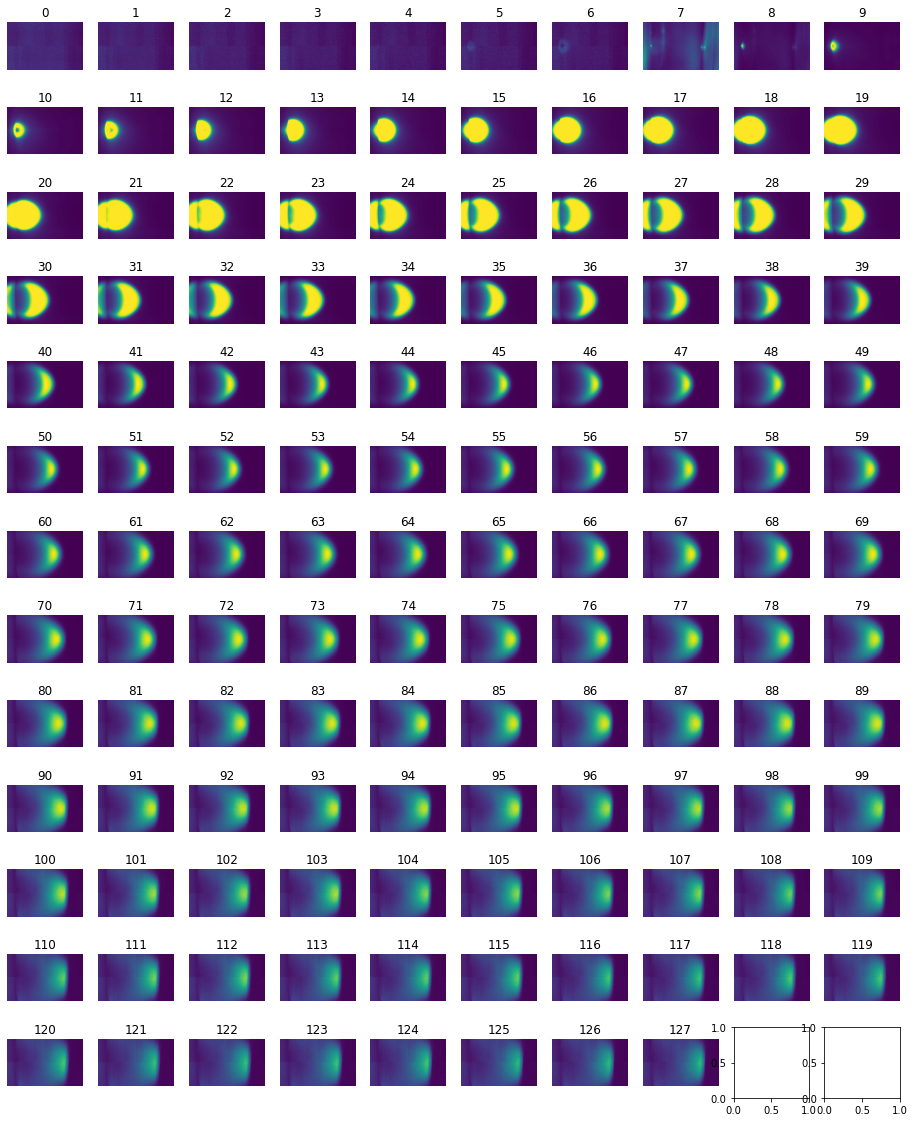

In [3]:
ds_name = '0-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [ ]:
condition = '100mj-700c-200mtorr-10hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg015 = m.to_df(plot_all)
df_yg015.sample(n=5)

In [ ]:
plot_metrics(df_yg015, sort_by='growth_index')

# YG016

In [ ]:
ds_path = '/scratch/yichen/pld_plumes/YG016_Yichen_Guo_04272022'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

In [ ]:
ds_name = '1-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [ ]:
condition = '100mj-700c-200mtorr-12hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg016 = m.to_df(plot_all)
df_yg016.sample(n=5)

In [ ]:
plot_metrics(df_yg016, sort_by='growth_index')

# sort with condition

In [ ]:
df_yg015_yg016 = pd.concat([df_yg015, df_yg016], ignore_index=True)

In [ ]:
plot_metrics(df_yg015_yg016, sort_by='condition')